## STAT 207 Lab 11: Regularized Logistic Regression

Due: Wednesday, April 29, 23:59:59

### Michael Cao AND minhcao2 

This lab concerns uses regularized logistic regression to develop a model for classifying email spam. The data are in the file "spam100.csv". The target variable 'spam' is 1 if the message is labeled as spam, and 0 if the message is labeled as not spam.

These data comprise a subset of a larger data set of email messages and numerous quantitative measures of the messages themselves. 

In the provided data for this lab, all of the quantitative feature variables have been scaled to  a 0-100 range by dividing by the maximum observed value for each feature. 

### Part 1: Data Preparation and visualization (10 pts)

**a) (3 pts)** Read the email spam data into a data frame, and separate out a feature matrix (data frame) X, and a target array y. Display the dimensions of X and its first few rows, including column names. Also display the first few elements of y along with its length.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
df = pd.read_csv("spam100.csv")
df

,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,word_freq_our,...,word_freq_will,word_freq_people,word_freq_report,word_freq_money,word_freq_mail.1,word_freq_email,word_freq_free,word_freq_free.1,word_freq_your,spam
0,0.00000,2.639752,0.000000,0.000000,0.000000,0.0,0.441809,1.614274,2.344197,56.250,...,0.000000,0.0,0.0,0.000000,22.453222,0.000000,0.000000,0.000000,5.940594,1
1,0.00000,17.857143,0.000000,0.000000,0.000000,0.0,0.493996,0.509771,1.572327,0.000,...,26.007802,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.001100,0
2,0.00000,0.000000,0.000000,0.000000,19.428571,0.0,1.536249,2.124044,1.629503,0.000,...,16.644993,0.0,0.0,19.219219,0.000000,0.000000,0.000000,0.000000,70.517052,1
3,0.00000,4.244306,0.000000,0.460087,0.000000,0.0,0.442105,0.934579,7.632933,3.125,...,3.250975,0.0,0.0,0.000000,0.000000,1.801802,0.000000,0.000000,4.180418,0
4,0.00000,15.217391,0.000000,0.000000,0.000000,0.0,0.370645,0.169924,0.428816,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.00000,49.482402,0.000000,0.000000,0.000000,0.0,1.067457,0.934579,1.029160,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
396,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.438844,0.509771,1.057747,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
397,2.56469,10.455487,7.891637,0.000000,1.333333,0.0,0.924240,4.418012,37.249857,0.000,...,1.950585,0.0,0.0,0.000000,0.000000,0.750751,0.000000,0.000000,1.650165,0
398,0.00000,0.000000,0.000000,3.519669,0.000000,0.0,0.573165,0.594732,1.658090,0.000,...,47.204161,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [8]:
y = df['spam']
X = df.drop(columns='spam')

In [9]:
mean_matrix = np.array((X[y==0].mean(), X[y==1].mean()))
display(mean_matrix.shape, mean_matrix)

(2, 25)

array([[ 1.63391783,  8.74344743,  2.22639902,  2.38168656,  1.22107396,
         0.1329848 ,  0.70764727,  1.50545021,  5.68166612,  3.30341312,
         1.77682209,  0.06842253,  0.72828189,  3.24227865,  2.28601761,
         1.15957447,  6.85111917,  2.57101482,  0.45503308,  0.21468277,
         2.28601761,  0.98524056,  0.40961635,  0.40961635,  4.69302249],
       [ 0.41287619,  5.7233829 ,  1.12503123, 10.54715547, 14.81558442,
         0.97780301,  2.95724689,  7.71092402, 13.0363671 , 12.75410354,
         8.620245  ,  5.65478574,  7.26793628, 12.6686217 ,  7.76412776,
         6.55757576,  7.58876148,  7.7899413 ,  2.11739241,  4.24788425,
         7.76412776,  5.63563564,  4.98031496,  4.98031496, 15.55422209]])

In [16]:
y

0      1
1      0
2      1
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    1
Name: spam, Length: 400, dtype: int64

In [19]:
props = y.value_counts(normalize =  True)
props

0    0.5875
1    0.4125
Name: spam, dtype: float64

**b) (1pt)** Compute the proportion of spam messages in the data set.

In [ ]:
dfspam = df[ df["spam"] == 1]

In [13]:
dfnonspam = df[ df["spam"] == 0]

In [14]:
len(df[ df["spam"] == 1]) / len(df)

0.4125

**c) (2 pts)** Show a bar plot comparing the proportion of zeros (non-spam) and the proportion of ones (spam) in the data.

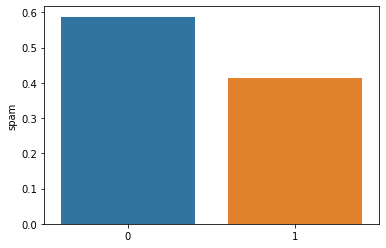

In [21]:
import matplotlib.pyplot as plt
sns.barplot(x = props.index, y = props)

**d) (3 pts)** Create a heat map comparing the mean values for all the feature variables in X when y=0 versus their mean values when y=1.  For an example see the notes, "15_regularized_logit".

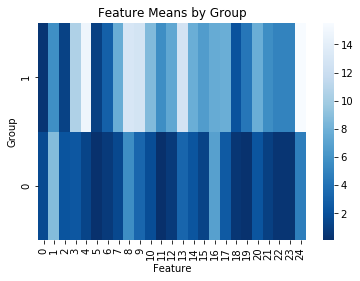

In [22]:
fig = sns.heatmap(mean_matrix, annot=False, linewidths=0, 
            square = False, cmap = 'Blues_r');
fig.set_ylim([0,2]);
plt.ylabel('Group');
plt.xlabel('Feature');
all_sample_title = 'Feature Means by Group'
plt.title(all_sample_title, size = 12);
plt.show(fig)

**e) (1 pt)** Based on the heat map, do you expect the feature variables to be useful for predicting spam versus nonspam? Why or why not?

Yes, because it has different pattern

### Part 2: Train / test regularized logistic regression (10 pts)

**a) (2 pts)** Split the data in the features matrix X and target y at random into training data and test data, using 10% of the data for testing. You should end up with two feature matrices (train and test) and two target arrays, the training y valaues and the test y values. Display the numbers of rows and columns of your train and test feature matrices.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

**b) (3 pts)** Fit an L1 penalized logistic regression model to your training data, using all of the features. Use an inverse penality C less than 1. If the model fit fails to converge try increasing the maximum number of iterations allowed. Display the feature coefficients for the training model.

In [29]:
logitReg = LogisticRegression(penalty='l1', 
                              solver='liblinear', 
                              C=0.5, 
                              max_iter=1000)


In [30]:
logitReg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**c) (3 pts)** Use the training model to get predicted categories (0/1) for the test data based on the test feature matrix, assuming a 0.5 cutoff for the predictive probability. Compute the overall accuracy (proportion correct) of these predictions.

In [32]:
yhat = logitReg.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [33]:
score = logitReg.score(X_test, y_test)
score

0.9

**d) (2 pts)** Use the test data to compute the estimated sensitivy and specificity based on the confusion matrix, or adapting any functions we developed in class notes. Here we label 1 = positive (spam) and 0 = negative (not spam).

In [34]:
def senspec(y, score, thresh, index=0):
    yhat = 1*(score >= thresh)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true=y, 
                                              y_pred=yhat).ravel()
    sens = tp / (fn + tp)
    spec = tn / (fp + tn)
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    return pd.DataFrame({'tn':[tn], 
                         'fp':[fp], 
                         'fn':[fn], 
                         'tp':[tp], 
                         'sens':[sens], 
                         'spec':[spec],
                         'accuracy':[accuracy]})

In [37]:
phat01 = logitReg.predict_proba(X_test)
phat1 = phat01[:,1]
phat1

array([0.04348709, 0.03126508, 0.75693634, 0.99718675, 0.0892227 ,
       0.8820183 , 0.08857469, 0.03723472, 0.18298787, 0.99998747,
       0.99658645, 0.03126508, 0.21361399, 0.99535933, 0.99205493,
       0.98101477, 0.29449702, 0.03440329, 0.04176871, 0.04293266,
       0.03126508, 0.54940916, 0.97942701, 0.08502996, 0.7998192 ,
       0.03351624, 0.05074588, 0.0753759 , 0.07029812, 0.98577186,
       0.04297519, 1.        , 0.03758379, 0.99994113, 0.71012111,
       0.97817843, 0.16087069, 0.03169774, 0.0560265 , 0.04272735])

In [40]:
senspec(y_test, phat1, 0.5)

,tn,fp,fn,tp,sens,spec,accuracy
0,23,3,1,13,0.928571,0.884615,0.9


### Part 3: Cross-validation (5 pts)

**a) (4 pts)** Using the same penalized logistic regression model you used in Part 2, use 10-fold cross validation (cv=10) to estimate the accuracy of the the L1 penalized logit classifier and also compute its standard error. Note that the estimated accuracy is the sample mean of the 10 different train/test accuracy scores produced by cross-validation, and the standard error for the mean is computed in the usual way for sample means. Display code and results. 

Note: if you have convergence problems, try using solver='liblinear' and max_iter=1000.

In [41]:
from sklearn.model_selection import cross_val_score

In [44]:
scores1 = cross_val_score(logitReg, X, y, cv=10)
scores1

array([0.95 , 0.875, 0.85 , 0.9  , 0.825, 0.85 , 0.875, 0.825, 0.875,
       0.925])

In [45]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores1.mean(), 2*scores1.std()/np.sqrt( 10)))

Accuracy: 0.88 (+/- 0.02)


**b) (1 pt)** Comment on whether the cross-validation average accuracy score differs noticeably from the single train/test accuracy estimate you calculated in Part 2. How would you explain the difference?

Not significantly different. The differences cause by applying model to many train data